In [24]:
%matplotlib  notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from maptools import make_map
import cartopy.io.img_tiles as cimgt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


filename = 'LipidData.csv' 
data = pd.read_csv(filename,header=0,na_values=' ')
list(data)

['YEAR',
 'LOC$',
 'MONTH$',
 'ORGLOC$',
 'ID1',
 'ID2',
 'ID3',
 'SizeClass',
 'SL',
 'NLSL',
 'WETWT',
 'NLWETWT',
 'DRYWT',
 'NLDRYWT',
 'VAR00014',
 'PERWATER',
 'ASHPERDRYWT',
 'PERAFDW',
 'TAGPERTOTLIP',
 'TAGPERDRYWT',
 'NOTTAGPDRYWT',
 'LIPPERDRYWT',
 'PERLEANAFDW',
 'VAR00023',
 'TAG',
 'FFA',
 'NOTTAG',
 'TOTLIP',
 'NLTAG',
 'NLFFA',
 'NLNOTTAG',
 'NLTOTLIP',
 'VAR00032',
 'GTAG',
 'GFFA',
 'GNOTTAG',
 'GTOTLIP',
 'GPRO',
 'NLGTAG',
 'NLGRAMFFA',
 'NLGNOTTAG',
 'NLGTOTLIP',
 'NLGPRO',
 'VAR00042',
 'TAGKJ',
 'NOTTAGKJ',
 'TOTLIPKJ',
 'PROKJ',
 'TOTALKJ',
 'NLTAGKJ',
 'NLNOTTAGKJ',
 'NLTOTLIPKJ',
 'NLPROKJ',
 'NLTOTALKJ',
 'DIFFTOTPROKJ',
 'VAR00053',
 'TAGPERTOTKJ',
 'NOTTAGPERTKJ',
 'TOTLIPPERKJ',
 'PROPERTOTKJ',
 'VAR00058',
 'TOTALENERGYJ',
 'EDENJPERGWET',
 'NLEDJPERGWET',
 'VAROOO59',
 'C',
 'N',
 'S',
 'ADJC',
 'ADJN',
 'ADJS',
 'ADJCONC1',
 'ADJCONC2',
 'CLASSLOC$',
 'VAR00069',
 'ESTGPROREG',
 'RESGPROREG',
 'VAR00077',
 'REQNLTAGKJ',
 'ESTNLTAGKJ',
 'NLTAGKJCON',
 'R

# Effect of habitat on juvenile weakfish bioenergetic condition in the Delaware Bay marshlands
### Taylor Eddy

### Introduction

Shallow, tidal salt marshes are a nursery habitat in the early life stages of many fishes. Because this is such a critical time in many species life history, it is critical to assess the value of the habitat to the species. Studies seeking to understand how habitat use affects the measures of secondary production (ie. Growth rates, condition, and energy reserves; Craig and Crowder 2002) has only included select taxa. Marine transient species, those that are not permanent residents of these nurseries, are absent in this restricted group of taxa previously studied (Litvin et al. 2014).

In this study, I will focus on assessing secondary production in terms of energy reserves in the juvenile weakfish, Cynoscion regalis. Weakfish are a marine transient species found in the Delaware bay ecosystem. In order to understand the role this estuarian system plays in the early life stages of the species, I will assess the biochemical condition of juvenile weakfish using lipid class analysis (Weber et al. 2003).  In many fishes, the ability to survive an offshore migration (typical in marine transient species) and overwintering conditions, may be dependent on the store of specific lipid classes (Norton et al. 2001). Triacylglycerols (TAG) are an important long-term energy storage lipid for most finfishes, and therefore are likely a principal indicator of condition. Understanding the proportion of lipids that account for storage lipid, and structural lipids is important in assessing the condition of juvenile weakfish, and what that means in terms of recruit survival.

Additionally, stable isotope analysis (SIA) using δ13C and δ15N can be used to trace the movements of the juvenile weakfish. The isotopic signatures of the fish reflect their diet in specific residencies within the Delaware Bay. Because plant communities vary between regions of the bay, the isotopic signature found in the food webs of the different regions are distinct. Based on these differences, we can assess site fidelity of smaller individuals (< 60mm standard length (SL)), and the movement through the bay for larger individuals. Coupled with the lipid data, we can find out where, in the Delaware Bay marshland ecosystem, juvenile weakfish begin the process of preparing for the offshore migration and overwintering. 

### Sample collection

Juvenile weakfish were collected from open water and tidal creeks of the Delaware Bay, and defined by regional habitats: open waters of the upper, middle and lower bay; upper bay, mid-bay, and lower bay marshes (Fig 1). Juvenile weakfish were sampled with a 4.9m otter trawl through each region. The individuals were separated into three size classes by their standard length:  small (< 60 mm SL), medium (60-100 mm SL), and large (> 100 mm SL). These size classes represent size-related changes in diet and attainment of energy stores.  These juveniles were collected in: August through October of 1999, 2000, and 2001 (N = 263), September of 2001 (N = 128), and in early November of 1999, 2001, and 2002 (N = 311), for a total of 702 individuals. 

<IPython.core.display.Javascript object>


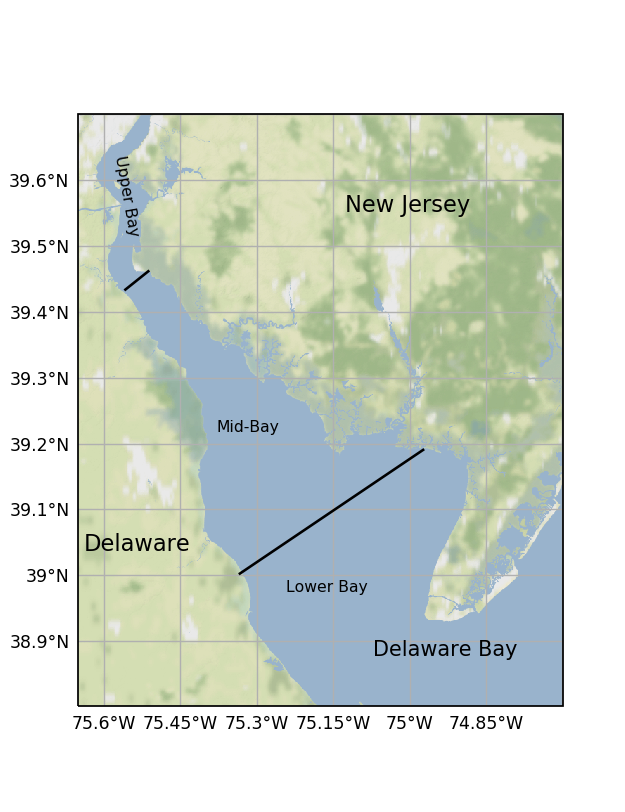

In [25]:
request = cimgt.StamenTerrain() # define the map style

extent = [-75.65, -74.7, 38.8, 39.7] # define the extent of the map, in decimal degrees

plt.figure(figsize=(5,6.5)) # change the figure size, so the axis are legible
ax = make_map(projection = request.crs) 
plt.plot([-8.406e6,-8.411e6],[4.788e6,4.784e6],'-k') # plot the upper line between upper bay and mid-bay
plt.plot([-8.346e6,-8.386e6],[4.749e6,4.722e6], '-k') # plot the lower line between mid-bay and lower bay

## annotate the map with bay regions, give context with state designations
plt.text(-8.414e6,4.811e6,'Upper Bay', fontsize = 9, rotation = -80)
plt.text(-8.391e6,4.753e6,'Mid-Bay', fontsize = 9)
plt.text(-8.376e6,4.718e6,'Lower Bay', fontsize = 9)
plt.text(-8.363e6,4.801e6,'New Jersey', fontsize = 13)
plt.text(-8.42e6,4.727e6, 'Delaware', fontsize = 13)
plt.text(-8.357e6,4.704e6, 'Delaware Bay', fontsize = 12)


ax.set_extent(extent) # set the extent with the definition from above
ax.add_image(request, 10);

### Sample processing

	
Detailed sample processing can be found in Litvin et al. 2014, but are outlined here. Each fish was measured, weighed, gut contents were removed, and freeze dried to a constant dry weight before ground into a fine powder. Subsamples of each whole fish were analyzed on a Stable Isotope Mass Spectrometer for the isotopic determinations. Isotopic data was normalized for lipid content and ontogenetic shifts by size class. 

Lipid concentration was determined by thin layer chromatography/flame ionization detection (TLC/FID). A 50mg (± 5 mg) sub sample of ground tissue was folded into a Whatman 541 ashless filter paper, and extracted in 4 ml of 2:1 dichloromethane:methanol solvent for 15 hours, 3 ml of fresh solvent for 3 hours, and a final extraction in 2 ml of fresh solvent. The 3 extractions were combined and stored at −80°C under N2 to prevent esterification of fatty acids in the extraction solvent. Lipid extracts were spotted on Iatron Chromarod III® silica-coted rods and partially developed in 3 successive HPLC grade solvent systems to separate lipid classes. FID scanning was used to determine the concentrations of the lipids. 

### Analysis

<IPython.core.display.Javascript object>


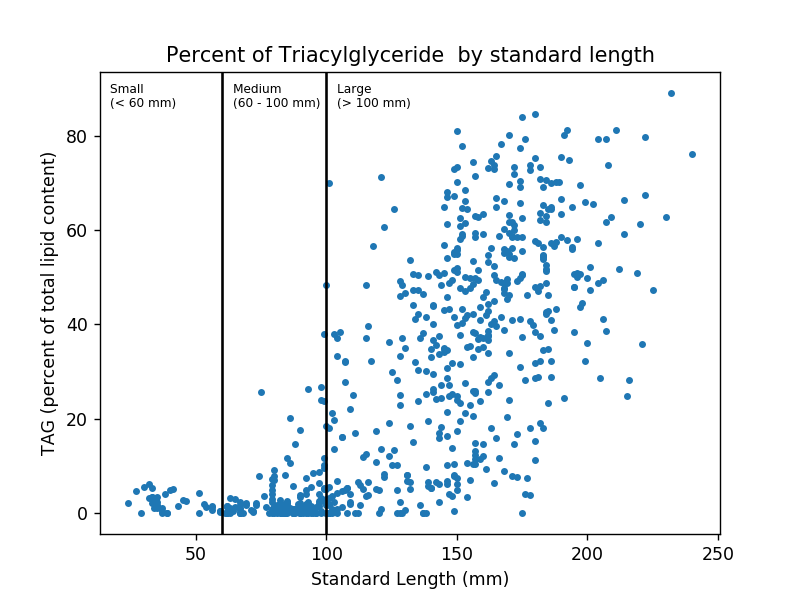

Results of the Kruskal Wallis test: H-Statistic =  323.35346108 P-value =  6.09099263335e-71


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
  L      M    -34.6271 -38.7966 -30.4576  True 
  L      S    -35.6324 -43.3792 -27.8856  True 
  M      S    -1.0053  -9.3099   7.2994  False 
-----------------------------------------------


In [27]:
#set up indices for the different size classes that represent different life history stages

Small = data[data['SL']<60]
Medium = data[(data['SL']>60)&(data['SL']<100)]
Large = data[data['SL']>100]

plt.figure()
plt.plot(data['SL'],data['TAGPERTOTLIP'],'.')
plt.title('Percent of Triacylglyceride  by standard length')
plt.xlabel('Standard Length (mm)')
plt.ylabel('TAG (percent of total lipid content)')
#add vertical lines to represent age classes
plt.axvline(x = 60,c = 'k')
plt.axvline(x = 100, c = 'k')
#annotate the age classes
plt.annotate('Small \n(< 60 mm)', (17,86), fontsize = 7)
plt.annotate('Medium \n(60 - 100 mm)', (64,86), fontsize = 7)
plt.annotate('Large \n(> 100 mm)', (104,86), fontsize = 7);

taglip_stat = stats.kruskal(Small['TAGPERTOTLIP'],Medium['TAGPERTOTLIP'],Large['TAGPERTOTLIP'])
print('Results of the Kruskal Wallis test:', 'H-Statistic = ', taglip_stat[0], 'P-value = ', taglip_stat[1])
print('\n')
print (pairwise_tukeyhsd(data['TAGPERTOTLIP'],data['SizeClass']))

<IPython.core.display.Javascript object>


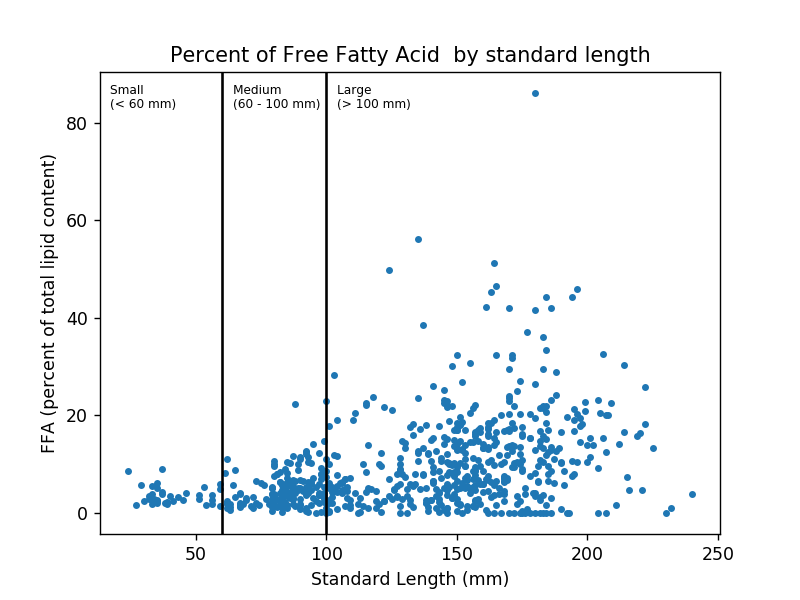

Results of the Kruskal Wallis test: H-Statistic =  93.3409177732 P-value =  5.38613503888e-21


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
  L      M    -6.4837  -8.3389  -4.6286  True 
  L      S    -7.8379  -11.2847 -4.3911  True 
  M      S    -1.3542  -5.0491   2.3408 False 
----------------------------------------------


In [29]:
plt.figure()
plt.plot(data['SL'],data['FFA'],'.')
plt.title('Percent of Free Fatty Acid  by standard length')
plt.xlabel('Standard Length (mm)')
plt.ylabel('FFA (percent of total lipid content)')
#add vertical lines to represent age classes
plt.axvline(x = 60,c = 'k')
plt.axvline(x = 100, c = 'k')
#annotate the age classes
plt.annotate('Small \n(< 60 mm)', (17,83), fontsize = 7)
plt.annotate('Medium \n(60 - 100 mm)', (64,83), fontsize = 7)
plt.annotate('Large \n(> 100 mm)', (104,83), fontsize = 7);

FFAlip_stat = stats.kruskal(Small['FFA'],Medium['FFA'],Large['FFA'])
print('Results of the Kruskal Wallis test:', 'H-Statistic = ', FFAlip_stat[0], 'P-value = ', FFAlip_stat[1])
print('\n')
print (pairwise_tukeyhsd(data['FFA'],data['SizeClass']))

<IPython.core.display.Javascript object>


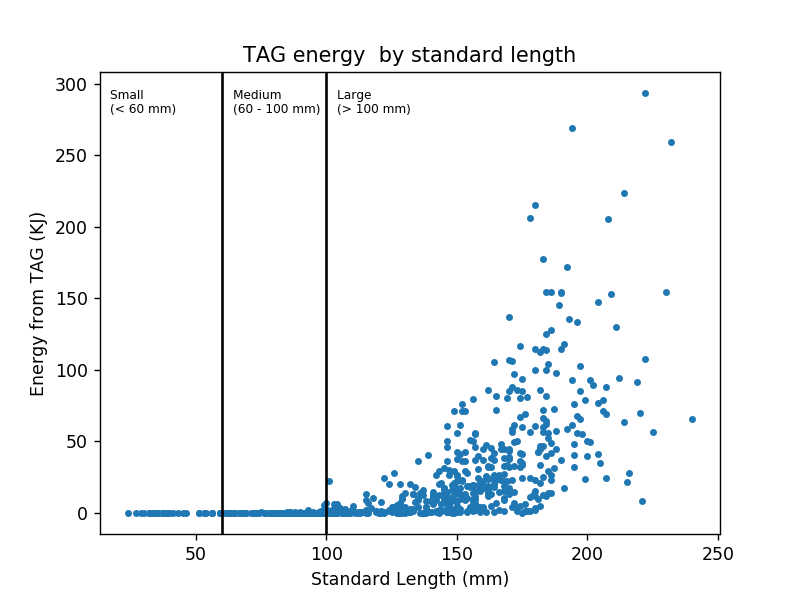

Results of the Kruskal Wallis test: H-Statistic =  354.885997642 P-value =  8.65933935203e-78


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
  L      M    -32.0324 -39.8257 -24.2392  True 
  L      S    -32.1882 -46.6678 -17.7087  True 
  M      S    -0.1558  -15.678  15.3664  False 
-----------------------------------------------


In [30]:
plt.figure()
plt.plot(data['SL'],data['TAGKJ'],'.')
plt.title('TAG energy  by standard length')
plt.xlabel('Standard Length (mm)')
plt.ylabel('Energy from TAG (KJ)')
#add vertical lines to represent age classes
plt.axvline(x = 60,c = 'k')
plt.axvline(x = 100, c = 'k')
#annotate the age classes
plt.annotate('Small \n(< 60 mm)', (17,280), fontsize = 7)
plt.annotate('Medium \n(60 - 100 mm)', (64,280), fontsize = 7)
plt.annotate('Large \n(> 100 mm)', (104,280), fontsize = 7);

tagKGlip_stat = stats.kruskal(Small['TAGKJ'],Medium['TAGKJ'],Large['TAGKJ'])
print('Results of the Kruskal Wallis test:', 'H-Statistic = ', tagKGlip_stat[0], 'P-value = ', tagKGlip_stat[1])
print('\n')
print (pairwise_tukeyhsd(data['TAGKJ'],data['SizeClass']))

<IPython.core.display.Javascript object>


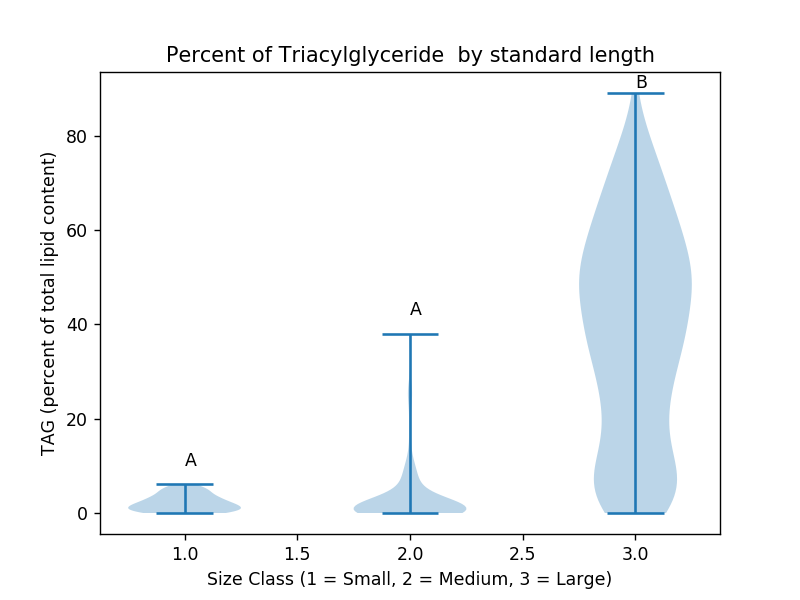

C:\Users\teddy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [35]:
plt.figure()
plt.violinplot((Small['TAGPERTOTLIP'],Medium['TAGPERTOTLIP'],Large['TAGPERTOTLIP']))
plt.title('Percent of Triacylglyceride  by standard length')
plt.xlabel('Size Class (1 = Small, 2 = Medium, 3 = Large)')
plt.ylabel('TAG (percent of total lipid content)')
plt.annotate('A', (1, 10))
plt.annotate('A', (2, 42))
plt.annotate('B', (3, 90));